In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import re
import collections as coll
import string

## Exercise 1

Read in a bunch of tweets that were collected during the airing of the 'Red Wedding' episode of Game of Thrones from the file `got_tweets.csv`.

Parse all the hashtags out of the texts, then count their overall occurrences. What are the 10 most common hashtags? Make a bar chart of these top 10 hashtags! Create a plot of hashtag timelines for the most interesting and frequent hashtags!

In [2]:
df_tweets = pd.read_csv('got_tweets.csv')
df_tweets['date'] = pd.to_datetime(df_tweets['created_at'])
df_tweets = df_tweets.sort_values(by='date').reset_index(drop=True)
df_tweets.head()

,id,created_at,created_at_shift,from_user,from_user_id,from_user_id_str,from_user_name,id_str,in_reply_to_status_id,in_reply_to_status_id_str,...,profile_image_url_https,query,source,text,to_user,to_user_id,to_user_id_str,to_user_name,type,date
0,3.415800e+17,6/3/2013 16:40,0,beanaar87,164087472,164087472,Aaron Bean,3.415800e+17,NaN,NaN,...,https://si0.twimg.com/profile_images/277803181...,#redwedding,"<a href=""http://twitter.com/"">web</a>",Just watched last night's #GameOfThrones and.....,NaN,NaN,NaN,NaN,NaN,2013-06-03 16:40:00
1,3.415800e+17,6/3/2013 16:40,0,Kaitlynmarrero,62039122,62039122,Kaitlyn Marley,3.415800e+17,NaN,NaN,...,https://si0.twimg.com/profile_images/368875327...,#redwedding,"<a href=""http://twitter.com/#!/download/ipad"">...",................#gameofthrones #redwedding,NaN,NaN,NaN,NaN,NaN,2013-06-03 16:40:00
2,3.415800e+17,6/3/2013 16:40,0,semanticwill,14724533,14724533,SemanticWill\u2122,3.415800e+17,NaN,NaN,...,https://si0.twimg.com/profile_images/346228653...,#redwedding,"<a href=""http://www.hootsuite.com"">HootSuite</a>","RT @Amy_Marie97: You know, on the Dothraki sca...",NaN,NaN,NaN,NaN,NaN,2013-06-03 16:40:00
3,3.415800e+17,6/3/2013 16:40,0,PatrickElven,77937897,77937897,Patrick Elven Ba\xf1aco,3.415800e+17,NaN,NaN,...,https://si0.twimg.com/profile_images/373309120...,#redwedding,"<a href=""http://twitter.com/download/android"">...",'@Fellaliana: Something intense really happens...,NaN,NaN,NaN,NaN,NaN,2013-06-03 16:40:00
4,3.415800e+17,6/3/2013 16:40,0,hoshivara,364850520,364850520,\u041b\u041e\u0421\u041e\u0421\u042c \u0421\u0...,3.415800e+17,NaN,NaN,...,https://si0.twimg.com/profile_images/362255420...,#redwedding,"<a href=""http://twitter.com/"">web</a>",\u041d\u0435\u044f\u0441\u043d\u044b\u0435 \u0...,NaN,NaN,NaN,NaN,NaN,2013-06-03 16:40:00


In [3]:
tmp = ' alma #korte eper'
re.findall('(?<=#)(\w+)',tmp)

['korte']

In [4]:
df_tweets['hastags'] = df_tweets['text'].apply(lambda x: re.findall('(?<=#)\w*',x))
hastags_list = [element for sublist in list(df_tweets['hastags']) for element in sublist] # make flatlist
hastags_list_dist = sorted(coll.Counter(hastags_list).items(),
                           key=lambda x:x[1],reverse=True)

In [5]:
print('First 10 most popular hastags and first occurence:\n')
for i in range(10):
    print(hastags_list_dist[i][0],df_tweets[df_tweets.text.str.contains(hastags_list_dist[i][0])]['created_at'].iloc[0])

First 10 most popular hastags and first occurence:

gameofthrones 6/3/2013 16:40
GameOfThrones 6/3/2013 16:40
GameofThrones 6/3/2013 16:44
redwedding 6/3/2013 16:40
RedWedding 6/3/2013 16:40
GoT 6/3/2013 16:40
got 6/3/2013 16:41
GOT 6/3/2013 16:43
Gameofthrones 6/3/2013 16:48
TheRainsofCastamere 6/3/2013 16:48


([<matplotlib.axis.XTick at 0x7fadb9143c90>,
 <a list of 10 Text xticklabel objects>)

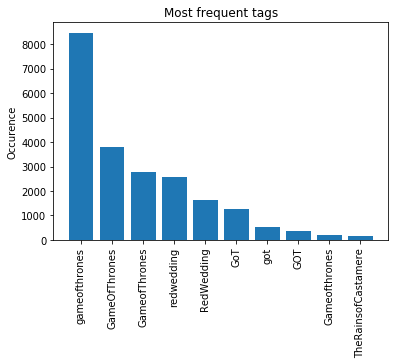

In [6]:
hastags_top10_names = [x[0] for x in hastags_list_dist[:10]]
hastags_top10_occu = [x[1] for x in hastags_list_dist[:10]]

# hastags_top10_stick_cord = range(1,11)
plt.bar(hastags_top10_names,hastags_top10_occu)
plt.title('Most frequent tags')
plt.ylabel('Occurence')
plt.xticks(hastags_top10_names,rotation = 90)

## Exercise 2

Tokenize the text of the tweets, and gather the 'real' words for each tweet.

By 'real' words, there should be:
* no punctuations
* hashtags only without `#` mark
* no user mentions
* no URLs
* no emojis
* no numbers

Count word occurrences, make a histogram of the occurrences. What are the top words? Are they what you expected?

What crazy words did you get? Explain possible approaches, with which you could throw out this kind of junk text as well.

In [7]:
def tokenize_text(text):
    # no punctuations
    text = text.translate(str.maketrans('', '', string.punctuation))
    # hashtags only without `#` mark
    text = re.sub('#','',text)
    # no user mentions
    text = re.sub('[@]\w*','',text)
    # no URLs
    text = re.sub('(http)[^ ]*','',text)
    # no emojis
    text = re.sub('(\:\w+\:|\<[\/\\]?3|[\(\)\\\D|\*\$][\-\^]?[\:\;\=]|[\:\;\=B8][\-\^]?[3DOPp\@\$\*\\\)\(\/\|])(?=\s|[\!\.\?]|$)','',text)
    # no numbers
    text = re.sub('\d*','',text)
    
    # replace multiple spaces with one space:
    text = re.sub(' +',' ',text)
    return text

In [8]:
tmp = 'It\'s :) :-$ ...,_-.* @ga2ng 321 wdawd #I need http://t.co/sKQH4GpTqB\' to:((( <>*>;*catch up on #GameofThrones because .'
tokenize_text(tmp)

'Its gang wdawd I need to catch up on GameofThrones because '

In [9]:
df_tweets['text_token'] = df_tweets['text'].apply(lambda x: tokenize_text(x))

whole_text = ' '.join(list(df_tweets['text_token']))
whole_text_list = whole_text.split(' ')
whole_text_dist = sorted(coll.Counter(whole_text_list).items(),
                           key=lambda x:x[1],reverse=True)

([<matplotlib.axis.XTick at 0x7fadb663e710>,
 <a list of 10 Text xticklabel objects>)

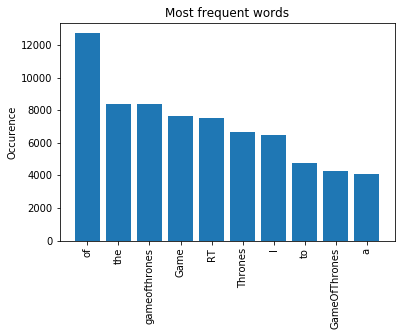

In [10]:
word_top10_names = [x[0] for x in whole_text_dist[:10]]
word_top10_occu = [x[1] for x in whole_text_dist[:10]]

# hastags_top10_stick_cord = range(1,11)
plt.bar(word_top10_names,word_top10_occu)
plt.title('Most frequent words')
plt.ylabel('Occurence')
plt.xticks(word_top10_names,rotation = 90)

# Results:
* I get no crazy words, I expected these words, except '' empty string character, because I didn't remove the multiple spaces. But it's okey now. :)

## Exercise 3


Extract the stopword list for the English language with the help of `nltk`. Download the standard Brown Corpus also from `nltk`, count the relative frequency of stopwords in both the Brown Corpus and the GoT tweets. Make a scatterplot of your results, try to explain possible similarities and deviations. What is the correlation in the stopword frequencies of the two datasets?

In [11]:
import nltk
nltk.download('stopwords')
nltk.download('brown')

from nltk.corpus import stopwords
from nltk.corpus import brown

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/nemethg/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package brown to /home/nemethg/nltk_data...
[nltk_data]   Package brown is already up-to-date!


In [12]:
def plot_bar_word_occu(word_occu,nr_of_words,first_n = 10):
    word_occu_sorted = sorted(word_occu.items(),key=lambda x:x[1],reverse=True)
    word_top_names = [x[0] for x in word_occu_sorted[:first_n]]
    word_top_occu = [x[1]/nr_of_words for x in word_occu_sorted[:first_n]]
    
    plt.bar(word_top_names,word_top_occu)
    plt.title('Most frequent words')
    plt.ylabel('Relative occurence')
    plt.xticks(word_top_names,rotation = 90)

In [13]:
len(whole_text_list)

355264

In [14]:
len(brown.words())

1161192

In [15]:
stopwords_list = stopwords.words('english')
tweets_stopword_occu = {k:v for k,v in whole_text_dist if k in stopwords_list }

tweets_stopword_occu = {}
for s_word in stopwords_list:
    if s_word in dict(whole_text_dist).keys():
        tweets_stopword_occu[s_word] = dict(whole_text_dist)[s_word]
    else:
        tweets_stopword_occu[s_word] = 0

# nr_tweets_stopwords = sum(list(tweets_stopword_occu.values()))
nr_tweets_stopwords = len(whole_text_list)

tweets_stopword_occu = {k:(v/nr_tweets_stopwords) for k,v in tweets_stopword_occu.items()}

###############
brown_word_dist = coll.Counter(brown.words())
brown_stopword_occu = {}
for s_word in stopwords_list:
    if s_word in brown_word_dist.keys():
        brown_stopword_occu[s_word] = brown_word_dist[s_word]
    else:
        brown_stopword_occu[s_word] = 0

# nr_brown_stopwords = sum(list(brown_stopword_occu.values()))
nr_brown_stopwords = len(brown.words())

brown_stopword_occu = {k:(v/nr_brown_stopwords) for k,v in brown_stopword_occu.items()}

Text(0.5, 1.0, 'Stopword occurence correlation')

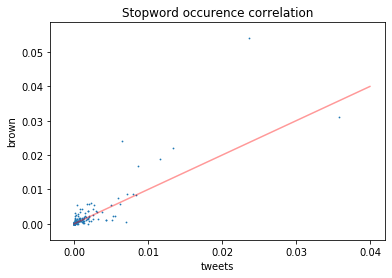

In [16]:
tweet_sword_reloccu = []
brown_sword_reloccu = []
for s_word in stopwords_list:
    tweet_sword_reloccu.append(tweets_stopword_occu[s_word])
    brown_sword_reloccu.append(brown_stopword_occu[s_word])
    
plt.scatter(tweet_sword_reloccu,brown_sword_reloccu,s=0.6)
plt.plot([0,0.04],[0,0.04],'r-',alpha=0.4)
plt.xlabel('tweets')
plt.ylabel('brown')
plt.title('Stopword occurence correlation')

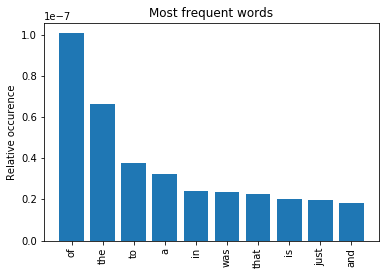

In [17]:
plot_bar_word_occu(tweets_stopword_occu,nr_tweets_stopwords,first_n=10)

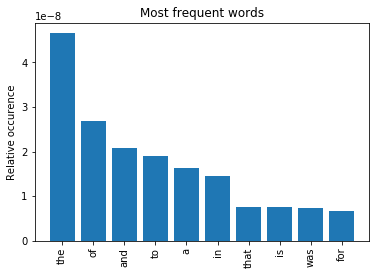

In [18]:
plot_bar_word_occu(brown_stopword_occu,nr_brown_stopwords,first_n=10)

# Result
The stopwords of the two database have a similar distribution. Some of the 10 most frequent words are the same.



## Exercise 4

A really common tool to visualize texts is a wordcloud. Find a suitable library and create a meaningful wordcloud of the GoT tweets (e.g. leave out punctuation, stopwords etc.)

In [19]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

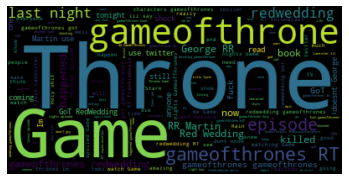

In [20]:
text = 'alma körte alma vág va fe alma körte'
wordcloud = WordCloud().generate(whole_text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Exercise 5

Define a time window in which all tweets count as one document. Create the term-document matrix of the tweets for this time segmentation. Apply stemming and stopword filtering.

In [21]:
from nltk.stem import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation


snow = SnowballStemmer('english',ignore_stopwords=True)

In [22]:
# tmp_df = pd.DataFrame({'a':[1,2,2,3,3,3,4],'b':['alma','k','ővel','v','a','l','eper']})
# tmp_df = pd.concat([tmp_df['a'],tmp_df.groupby(tmp_df.a.values).transform(lambda x: ' '.join(x))],axis=1)
# # df.groupby(df.a.values).transform(lambda x: x)
# tmp_df

In [23]:
# time window = 1 minute
df_tweets_sub = df_tweets[['created_at','text','hastags','text_token']]
df_tweets_sub = pd.concat([df_tweets_sub['created_at'],
                           df_tweets_sub.groupby(df_tweets_sub.created_at.values).transform(lambda x: ' '.join(x)).drop(['created_at'],axis = 1)],axis=1)
df_tweets_sub = df_tweets_sub.drop_duplicates().reset_index(drop=True)
df_tweets_sub['text_token'] = df_tweets_sub['text_token'].apply(lambda x: snow.stem(x))
df_tweets_sub.head()

,created_at,text,text_token
0,6/3/2013 16:40,Just watched last night's #GameOfThrones and.....,just watched last nights gameofthrones and i h...
1,6/3/2013 16:41,Finally got to watch the latest ep of #gameoft...,finally got to watch the latest ep of gameofth...
2,6/3/2013 16:42,And this is me right now after watching game o...,and this is me right now after watching game o...
3,6/3/2013 16:43,I knew #GOT would end with the #RedWedding got...,i knew got would end with the redwedding gotta...
4,6/3/2013 16:44,Dealing with my #redwedding feels by favoritin...,dealing with my redwedding feels by favoriting...


In [24]:
c = CountVectorizer()
tt = nltk.tokenize.TweetTokenizer(preserve_case=True,strip_handles=True,reduce_len=True)
ss = nltk.stem.SnowballStemmer('english')

def custom_tokenizer(text):
    """
    The input is the string to tokenize.
    
    The output is the list of desired words.
    """
    words = tt.tokenize(text)
    return [ss.stem(w) for w in words if re.match('^[a-z]+$',w)!=None]

In [25]:
c = TfidfVectorizer(tokenizer=custom_tokenizer,stop_words='english',min_df=5,norm='l2')
X = c.fit_transform(df_tweets_sub['text'])
words = c.get_feature_names()

/home/nemethg/Programs/Anaconda/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'afterward', 'alon', 'alreadi', 'alway', 'ani', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becaus', 'becom', 'befor', 'besid', 'cri', 'describ', 'dure', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'forti', 'henc', 'hereaft', 'herebi', 'howev', 'hundr', 'inde', 'mani', 'meanwhil', 'moreov', 'nobodi', 'noon', 'noth', 'nowher', 'onc', 'onli', 'otherwis', 'ourselv', 'perhap', 'pleas', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'themselv', 'thenc', 'thereaft', 'therebi', 'therefor', 'togeth', 'twelv', 'twenti', 'veri', 'whatev', 'whenc', 'whenev', 'wherea', 'whereaft', 'wherebi', 'wherev', 'whi', 'yourselv'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


In [26]:
c

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=None,
                min_df=5, ngram_range=(1, 1), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words='english', strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=<function custom_tokenizer at 0x7fadb3138950>,
                use_idf=True, vocabulary=None)

In [27]:
print(X.shape)

(292, 2534)


## Exercise 6

Apply a TF-IDF weighting scheme for the term-document matrix by hand (e.g. do not use a built-in vectorizer, but normalize by text length with a summation etc. `numpy` or `pandas` is strongly suggested). Then, choose a topic detection method such as LSI or LDA, and run it on your matrix. Try to interpret your results! Are your topics meaningful? Which topics are the most representative of your document?

In [28]:
l = LatentDirichletAllocation(n_components=3,n_jobs=-1)
T = l.fit_transform(X)
W = l.components_

No handles with labels found to put in legend.


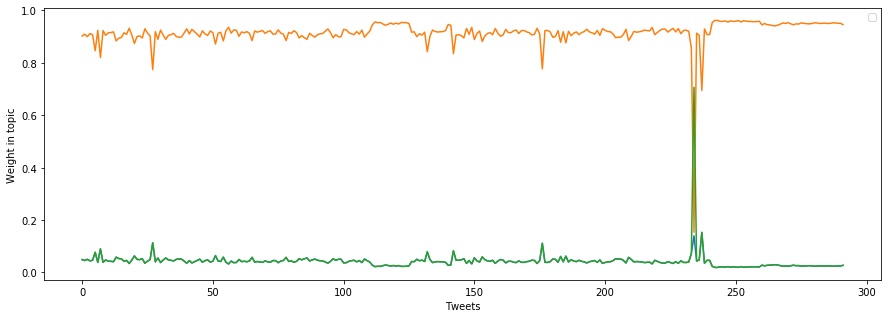

In [29]:
plt.figure(figsize=(15,5))
plt.plot(T,markersize=1)
plt.xlabel('Tweets')
plt.ylabel('Weight in topic')
plt.legend()
plt.show()

## Exercise 7

Write an own name parser for the tweets, and consider all names that you find in the dataset as a node of a graph. Add 1 to the weight of an edge if two names occur in the same tweet. With the help of networkx, draw the weighted network of names from the text. Try to find a simple clustering algorithm in networkx, cluster the names in the dataset. Print or visualize your results!

In [30]:
def edgelist_of_complete_graph(node_list):
    source = []
    target = []
    weight = []
    
    G = nx.complete_graph(node_list)
    df_elist = nx.to_pandas_edgelist(G)
    source = list(df_elist.source)
    target = list(df_elist.target)
    weight = [1]*len(target)
    return source,target,weight

edgelist_of_complete_graph(['a','b','c'])

(['a', 'a', 'b'], ['b', 'c', 'c'], [1, 1, 1])

In [31]:
df_tweets['nodes'] = df_tweets['text'].apply(lambda x: re.findall('(?<=@)\w*',x))
df_tweets[df_tweets['nodes'].apply(lambda x: len(x)) >1]

source = []
target = []
weight = []
for i,row in df_tweets.iterrows():
    
    node_list = row['nodes']
    node_list = [x for x in node_list if x!='']
    if len(node_list) > 1:
        
        if '' in node_list:
            print(node_list)
        s,t,w = edgelist_of_complete_graph(node_list)
        source += s
        target += t
        weight += w
        
df_elist_tweet = pd.DataFrame({'source':source,'target':target,'weight':weight})
df_elist_tweet = df_elist_tweet.groupby(['source','target'],as_index=False).sum().reset_index(drop=True)


In [32]:
df_elist_tweet.head()

,source,target,weight
0,14willgetu20,Liberaces_AK,1
1,4larshewA,swagminatti,1
2,ABrettleJones,IsleOfWightFest,1
3,ABrettleJones,JohnGiddings01,1
4,AJ_Paul,GameOfThrones,1


Nr of nodes: 1342
Nr of edges: 1132


Text(0, 0.5, 'Counter')

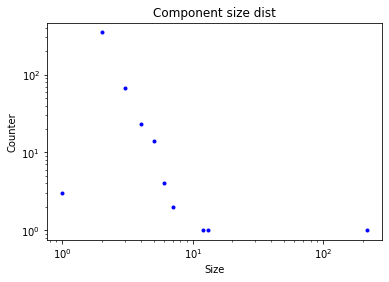

In [33]:
network_tweet = nx.from_pandas_edgelist(df_elist_tweet,edge_attr='weight',create_using=nx.Graph())
print('Nr of nodes:',network_tweet.number_of_nodes())
print('Nr of edges:',network_tweet.number_of_edges())

components_sizes = coll.Counter([len(c) for c in sorted(nx.connected_components(network_tweet), key=len, reverse=True)])

plt.plot(list(components_sizes.keys()),list(components_sizes.values()),'b.')
plt.xscale('log')
plt.yscale('log')
plt.title('Component size dist')
plt.xlabel('Size')
plt.ylabel('Counter')

/home/nemethg/Programs/Anaconda/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


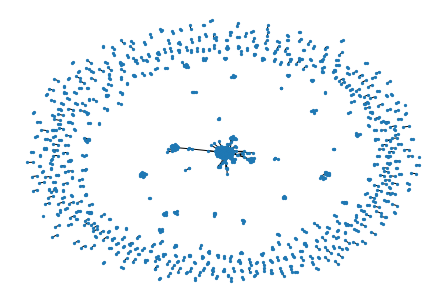

In [34]:
nx.draw(network_tweet,node_size = 5)

# Results:

The best way to know which user has some connection with an other user is the connected components. Within one component the nodes or users can communicate with each other. 

## Exercise 8

This episode caused severe disappointments in many viewers, because of the sudden death of too many of the favourite characters. Search for some sentiment analysis method, and create a timeline of sentiments based on the tweet texts. Do the sentiments on Twitter reflect the time of the worst scene?

In [35]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [36]:
%%time
print('alma')

alma
CPU times: user 182 µs, sys: 3 µs, total: 185 µs
Wall time: 138 µs


In [37]:
%%time
time = []
sentiment_values = []

analyzer = SentimentIntensityAnalyzer()

for i, row in df_tweets.iterrows():
#     if i%1000 == 0:
#         print(i)
    vs = analyzer.polarity_scores(row['text_token'])
    time.append(row['date'])
    sentiment_values.append(vs)

CPU times: user 7.19 s, sys: 7.87 ms, total: 7.2 s
Wall time: 7.22 s


In [38]:
def key_of_max_value_in_dict(my_dict):
    max_value = max(my_dict.values())
    
    for k in my_dict.keys():
        if my_dict[k] == max_value:
            return k
def get_main_sentiment_list(sentiments):
    main_sentiments = []
    for i in range(len(sentiments)):
        main_sentiments.append(key_of_max_value_in_dict(sentiments[i]))
    return main_sentiments

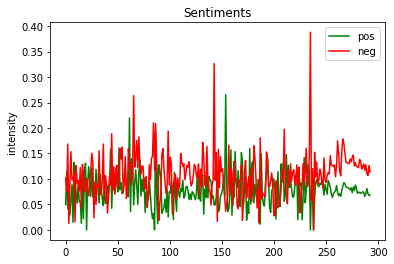

In [39]:
pos = []
neg = []
neu = []
compound = []

for i in range(len(sentiment_values)):
    s = sentiment_values[i]
    pos.append(s['pos'])
    neg.append(s['neg'])
    neu.append(s['neu'])
    compound.append(s['compound'])

df_tweets['sentiment_pos'] = pos
df_tweets['sentiment_neg'] = neg
df_tweets['sentiment_neu'] = neu
df_tweets['sentiment_compound'] = compound

df_sentiment = df_tweets[['date','sentiment_pos','sentiment_neg','sentiment_neu','sentiment_compound']]
df_sentiment = df_sentiment.groupby(['date'],as_index=False).mean()

pos_avg = list(df_sentiment['sentiment_pos'])
neg_avg = list(df_sentiment['sentiment_neg'])
neu_avg = list(df_sentiment['sentiment_neu'])
compound_avg = list(df_sentiment['sentiment_compound'])

tt = np.linspace(0,len(pos_avg),len(pos_avg))
plt.plot(tt,pos_avg,'g-',label = 'pos')
plt.plot(tt,neg_avg,'r-',label = 'neg')
# plt.plot(tt,neu_avg,'y-',label = 'neu')
# plt.plot(tt,compound_avg,'b-',label = 'compound')
plt.title('Sentiments')
plt.ylabel('intensity')
plt.legend()

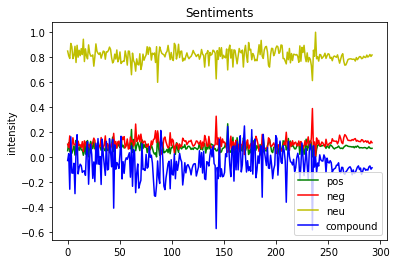

In [40]:
plt.plot(tt,pos_avg,'g-',label = 'pos')
plt.plot(tt,neg_avg,'r-',label = 'neg')
plt.plot(tt,neu_avg,'y-',label = 'neu')
plt.plot(tt,compound_avg,'b-',label = 'compound')
plt.title('Sentiments')
plt.ylabel('intensity')
plt.legend()

In [41]:
compound_avg.index(min(compound_avg[:200]))

142

# Result:
The first peak of the negativity was after one hour, the episode was 52 minutes long. It could be the end of the episode